<a href="https://colab.research.google.com/github/MyDearGreatTeacher/AI_and_security/blob/master/%E7%AC%AC%E4%B8%80%E5%A0%82PyTorch%E8%AA%B2%E7%A8%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** 第一堂PyTorch課程 **

在Google Colab安裝PyTorch套件

In [0]:
!pip3 install torchvision

線性回歸Linear Regression

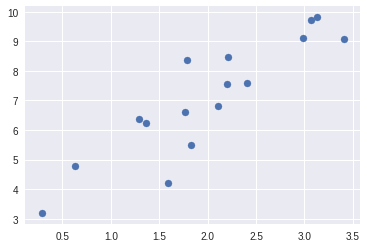

In [0]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

#device = t.device('cpu') #如果你想用gpu，改成t.device('cuda:0')

# 設置亂數種子，保證在不同電腦上運行時下面的輸出一致
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 產生亂數據：y=x*2+3，加上了一些雜訊'''
    x = t.rand(batch_size, 1) * 5
    y = x * 2 + 3 +  t.randn(batch_size, 1)
    #x = t.rand(batch_size, 1, device=device) * 5
    #y = x * 2 + 3 +  t.randn(batch_size, 1, device=device)
    return x, y

# 來看看產生的x-y分佈
x, y = get_fake_data(batch_size=16)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())


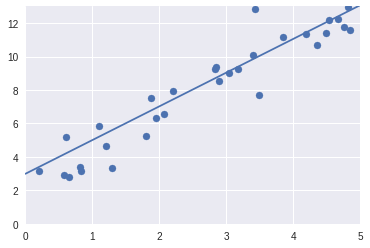

w:  
 1.9537
[torch.FloatTensor of size 1x1]
 b:  
 3.0351
[torch.FloatTensor of size 1x1]



In [0]:
# 隨機初始化參數
w = t.rand(1, 1)
b = t.zeros(1, 1)
#w = t.rand(1, 1).to(device)
#b = t.zeros(1, 1).to(device)

lr =0.02 # 學習率

for ii in range(500):
    x, y = get_fake_data(batch_size=4)
    
    # forward：計算loss
    y_pred = x.mm(w) + b.expand_as(y) # x@W等價於x.mm(w);for python3 only
    loss = 0.5 * (y_pred - y) ** 2 # 均方誤差
    loss = loss.mean()
    
    # backward：手動計算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # 更新參數
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii%50 ==0:
       
        # 畫圖
        display.clear_output(wait=True)
        x = t.arange(0, 6).view(-1, 1)
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.cpu().numpy(), y.cpu().numpy()) # predicted
        
        x2, y2 = get_fake_data(batch_size=32) 
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)
        
#print('w: ', w.item(), 'b: ', b.item())
print('w: ', w, 'b: ', b)
